In [34]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.1-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


In [35]:
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats

### import data

In [3]:
url="https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv"
s=requests.get(url).content
eda=pd.read_csv(io.StringIO(s.decode('utf-8')))

### first 10 rows

In [4]:
eda.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### use .info()

In [5]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### a way to delete items with more than 30% null

In [6]:
col_list = eda.columns.to_list() #select columns name
def pct_null_values(df):    #function to calculate % off null values
    return (df.isnull().sum())/ len(df)*100
def get_cols(df,percent):           #get column name with more 30% null
    col_less_70 = [x for x in col_list if pct_null_values(df[x]) >percent]
    return col_less_70 #get column name with more 30% null

get_cols(eda,70)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

### use .describe() to get info on Saleprice

In [7]:
eda.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### SalePrice distribution with a displot.

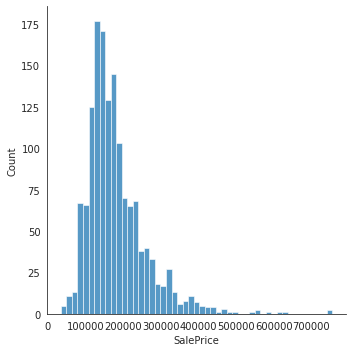

In [8]:
sns.set_style('white', {'legend.frameon':True})
sns.displot(data = eda, x='SalePrice')

## Focus variables quantitatives:
   ### select int64 and float64 features

int64 features:  
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
float64 features:  
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

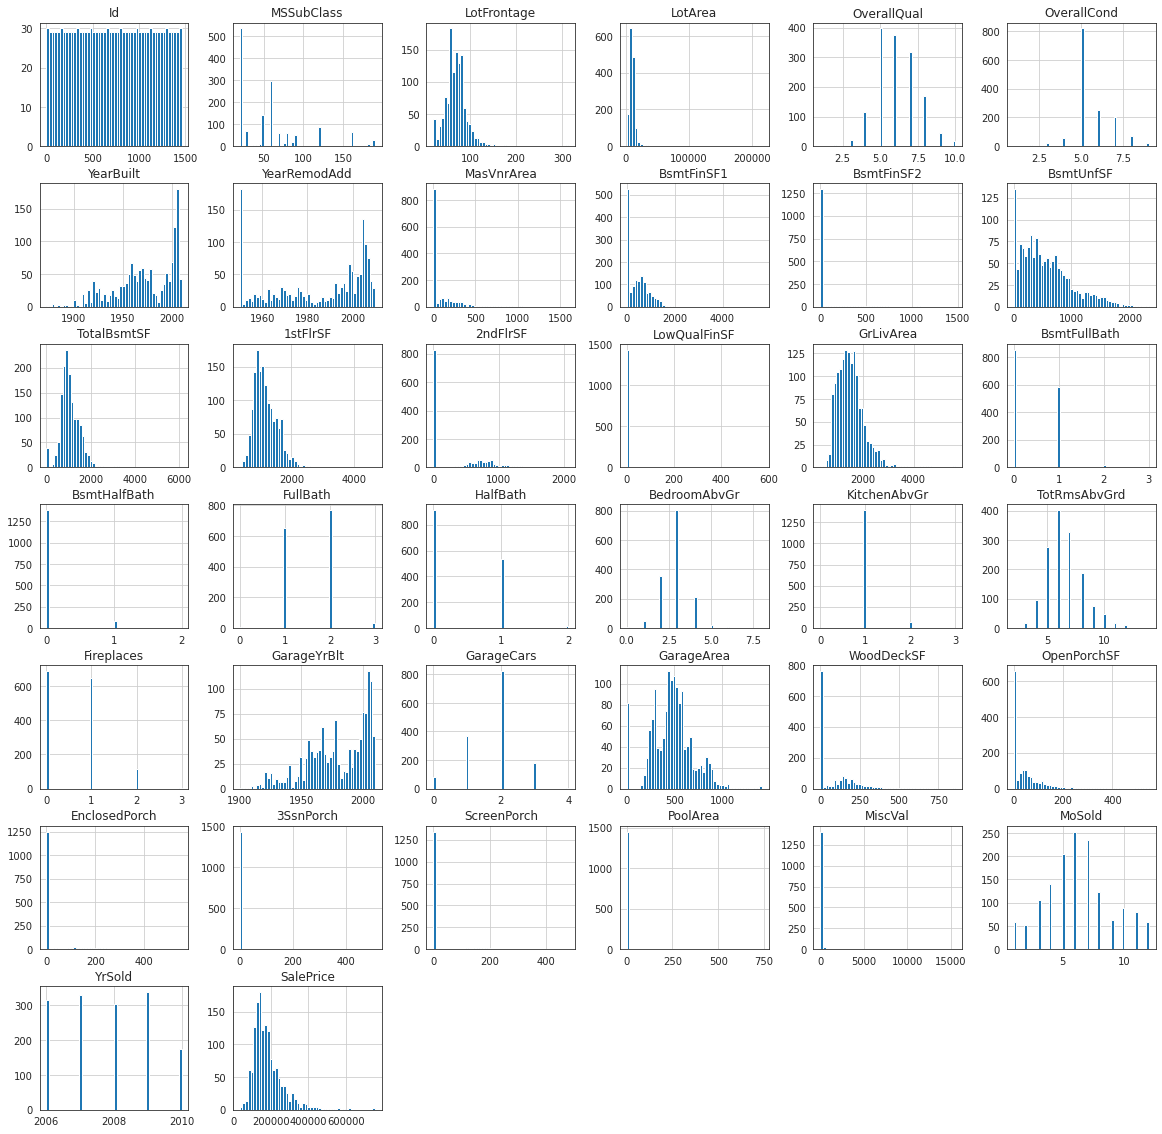

In [9]:
int_col = [x for x in col_list if eda[x].dtype == 'int64']
float_col = [x for x in col_list if eda[x].dtype == 'float64']
print ('int64 features: ','\n', int_col)
print ('float64 features: ','\n', float_col)
eda.hist(bins=50, figsize=(20,20))

   ### wich features have a distribution that look like SalePrice?
- int64 features:
 ['MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea'??,'GarageArea'?,WoodDeckSF??,'OpenPorchSF' ???]
- float64 features:
 ['LotFrontage']

### print the most 10 more correlated feature with SalePrice:

In [10]:
def corr_value(df,feat,list_,value):
    print ('Correlation for', feat, 'with : ','\n')
    for x in list_:
        if df[feat].corr(df[x]) > value:
            print(  x, ' = ' ,df[feat].corr(df[x]))
int_col_corr= corr_value(eda,'SalePrice',int_col,0.5)
float_col_corr= corr_value(eda,'SalePrice',float_col,0.5)

Correlation for SalePrice with :  

OverallQual  =  0.7909816005838044
YearBuilt  =  0.5228973328794969
YearRemodAdd  =  0.5071009671113864
TotalBsmtSF  =  0.6135805515591956
1stFlrSF  =  0.6058521846919147
GrLivArea  =  0.7086244776126523
FullBath  =  0.5606637627484449
TotRmsAbvGrd  =  0.5337231555820282
GarageCars  =  0.6404091972583529
GarageArea  =  0.6234314389183618
SalePrice  =  1.0
Correlation for SalePrice with :  



   ### other way :

In [11]:
int_col_corr = [x for x in int_col if eda['SalePrice'].corr(eda[x]) > 0.5 ]
float_col_corr = [x for x in float_col if eda['SalePrice'].corr(eda[x])> 0.5 ]
print(int_col_corr)
print(float_col_corr)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
[]


   ### pairplot with selected features :

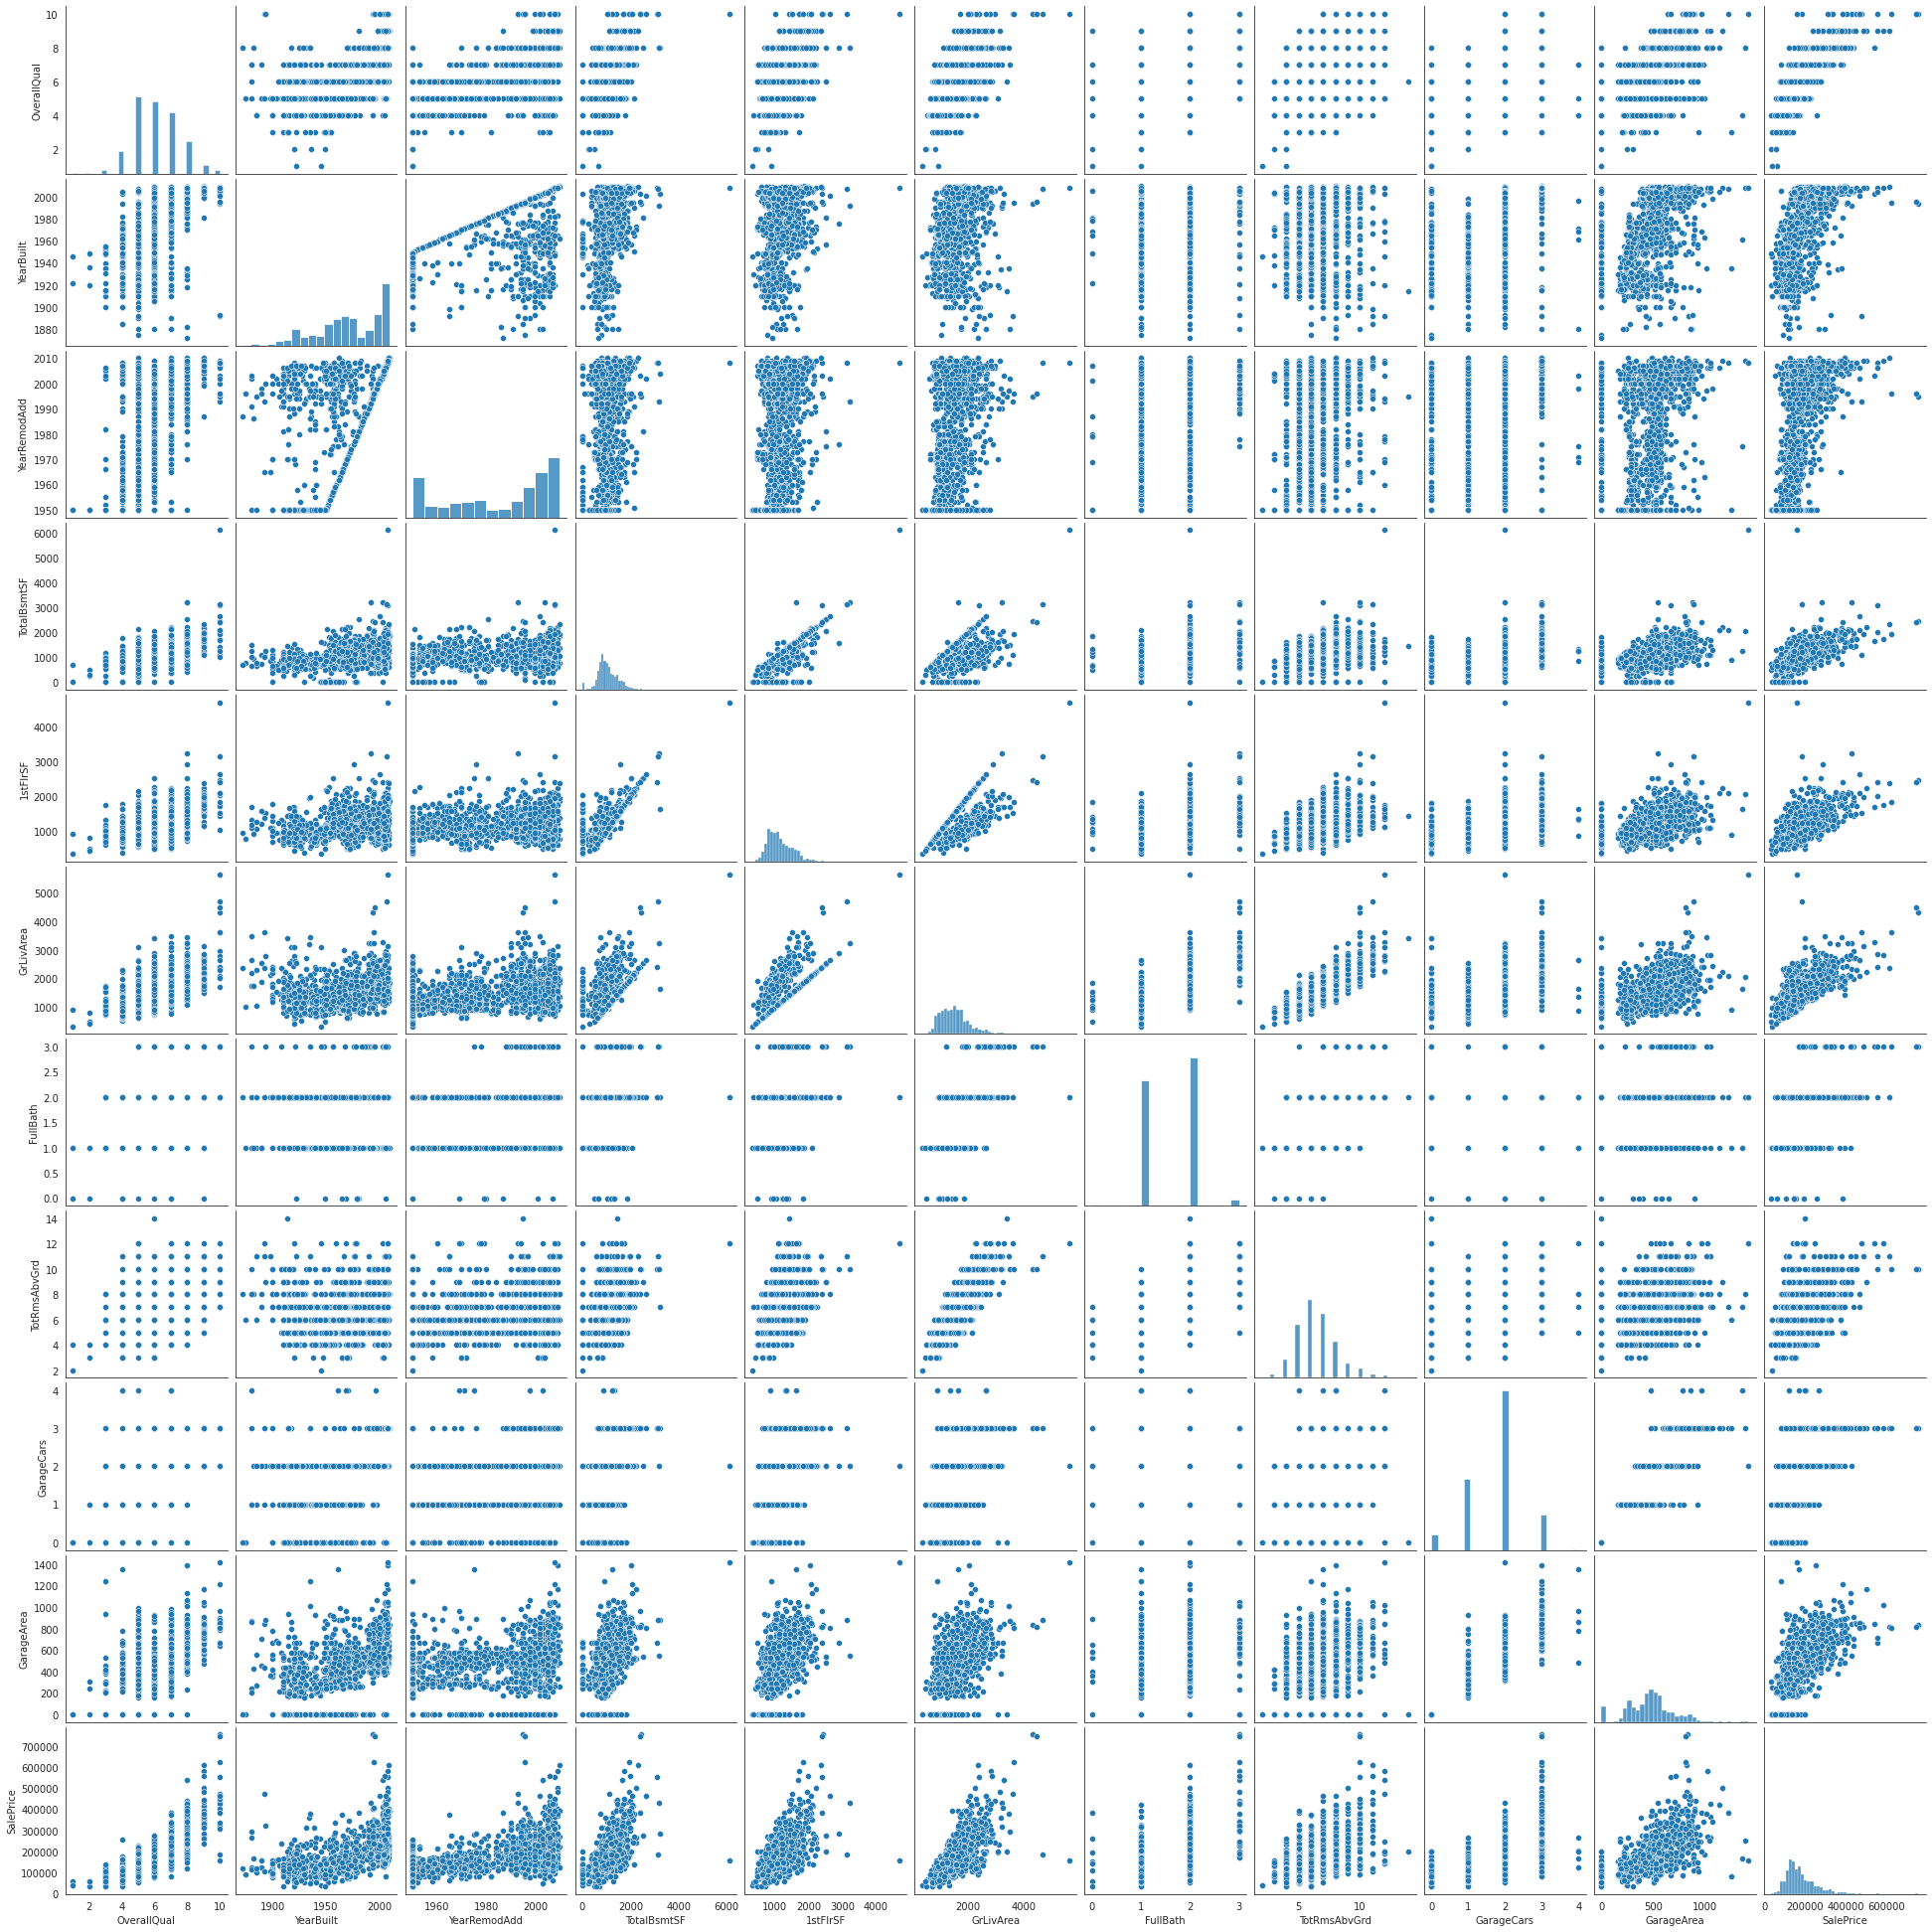

In [13]:
eda_pair=eda[int_col_corr]
sns.pairplot(data = eda_pair)

 ### what is the form of the chart for the most 3 correlated features ?
 => strait cloud of dots

   ### a heatmap :
    #### most correlated features with SalePrice are :'OverallQual', 'GrLivArea', adn 'GarageCars'

<AxesSubplot:>

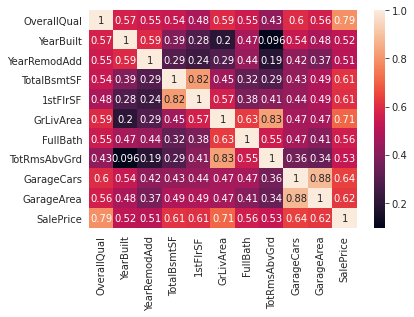

In [14]:
sns.heatmap(eda_pair.corr(),annot=True)

   ### a regplot with ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

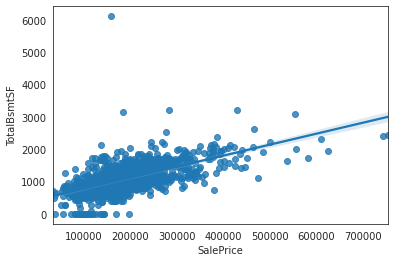

In [15]:
cols= ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
sns.regplot(x=eda.SalePrice,y=eda.TotalBsmtSF)

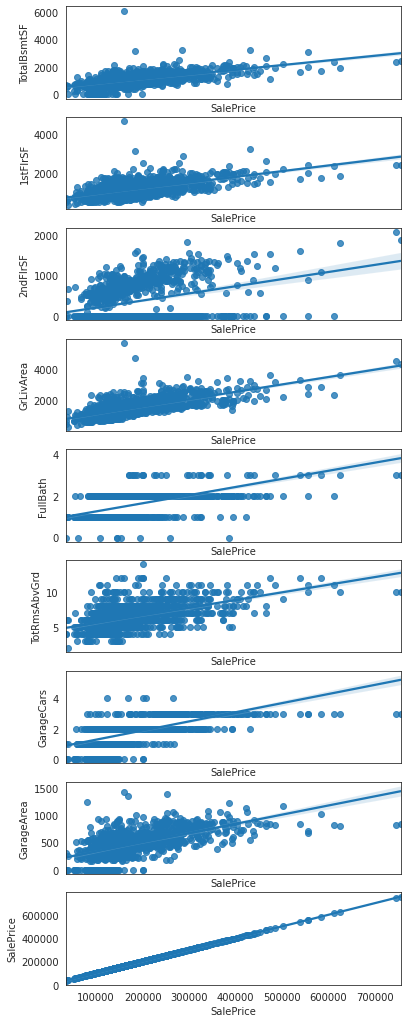

In [16]:
n=len(cols)
fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col=cols[i]
    sns.regplot(x = eda.SalePrice, y=eda[col])

   ###  jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea

/home/apprenant/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


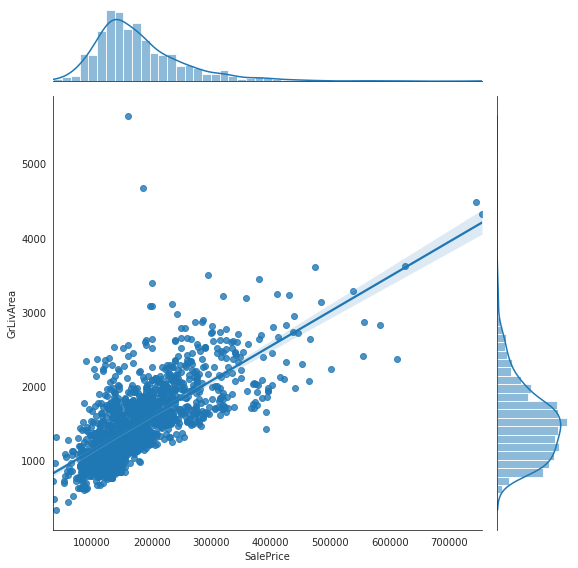

In [17]:
p=sns.jointplot('SalePrice', 'GrLivArea', data = eda, kind='reg', height=8)

## Focus variables qualitatives:
   ### select object type features

In [26]:
object_col = [x for x in col_list if eda[x].dtype == 'object']
print(len(object_col))

43


In [ ]:
eda_count=pd.DataFrame(eda[object_col],eda['SalePrice'])
eda_count.reset_index(inplace=True)

   ### countplot on all object features

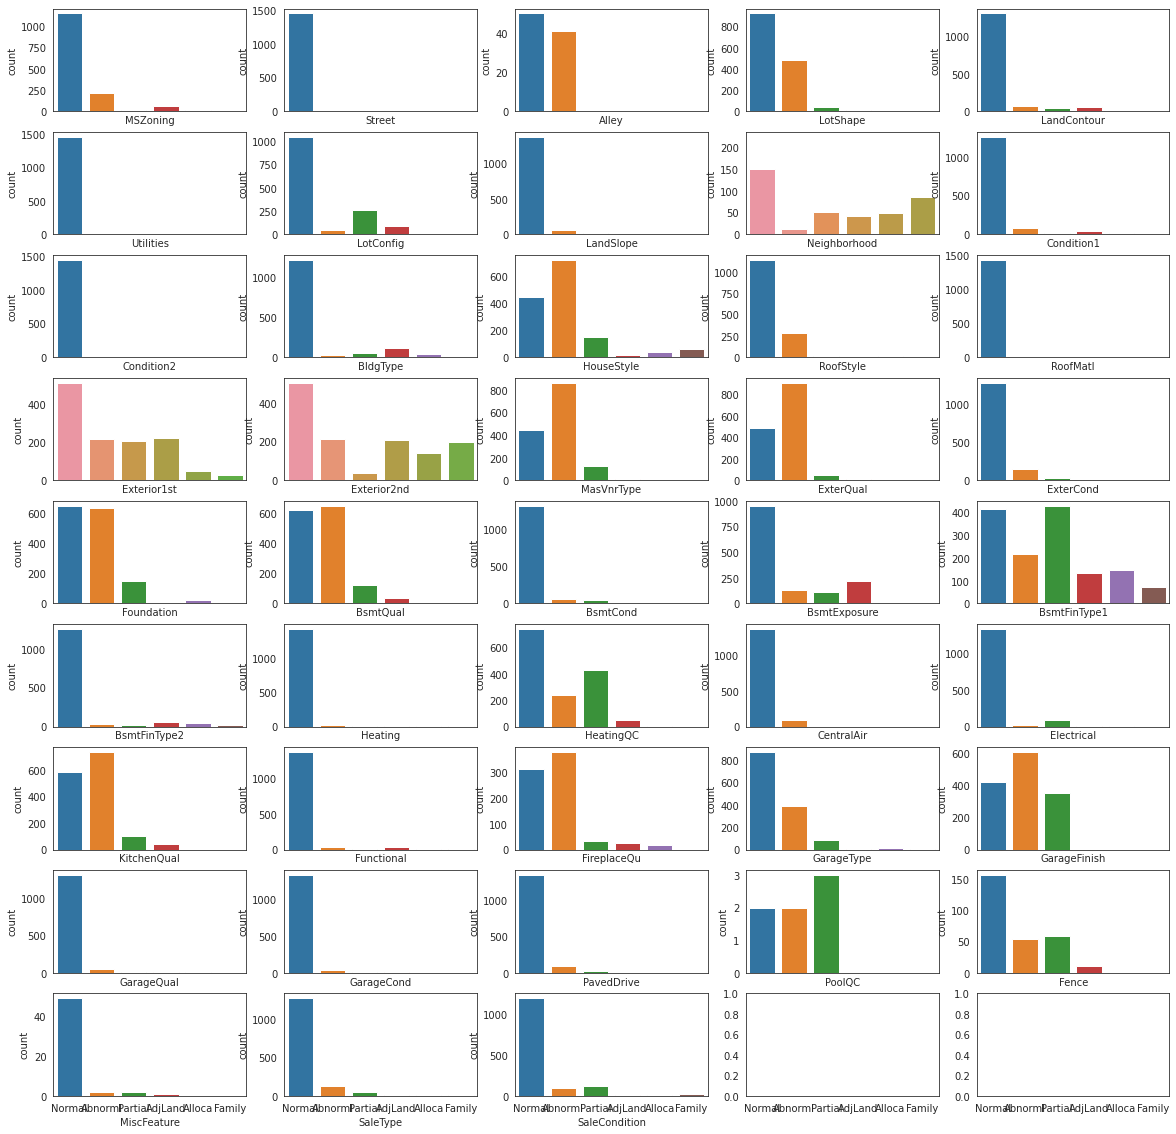

In [31]:
f, axes = plt.subplots(9,5,figsize=(20,20), sharex=True)
for f,ax in zip(object_col, axes.ravel()):
    sns.countplot(eda[f], ax=ax)
#    ax.set_title(f)

 ### 5 features that don't explain Sale price:
 'utilities', 'Condition', 'RoofMatl', 'Heating','Street'

  ## Machine learning with skealrn Linear Regression:

  ### a new dastaframe with only numerical features

In [65]:
eda_LR= pd.concat([eda[int_col], eda[float_col]],axis=1)
eda_LR.isnull().sum()

Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
dtype: int64

In [66]:
'''Selecting features to train model'''
X=eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
                'SalePrice'],axis=1)
y=eda_LR['SalePrice']

'''We set the size of the train set to 75%. And the rest is for the test set.
We set the split NOT in random.'''

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,  train_size = 0.75)


'''# Here we train the model only on the train dataset.'''
model_LR = LinearRegression().fit(X_train, y_train)

'''# And now we compare both scores :'''
print('for several criteria scores are : ')
print("\nScore for the Train dataset :", model_LR.score(X_train, y_train))
print("Score for the Test dataset :", model_LR.score(X_test, y_test))


for several criterias the scores are : 

Score for the Train dataset : 0.8012252433958189
Score for the Test dataset : 0.8197277151480304


   ### prediction for sale price:

In [67]:
eda_LR['p_SalePrice']=model_LR.predict(eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
                'SalePrice'],axis=1))

 ### plotting SalePrice and Predicted SalePrice:

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

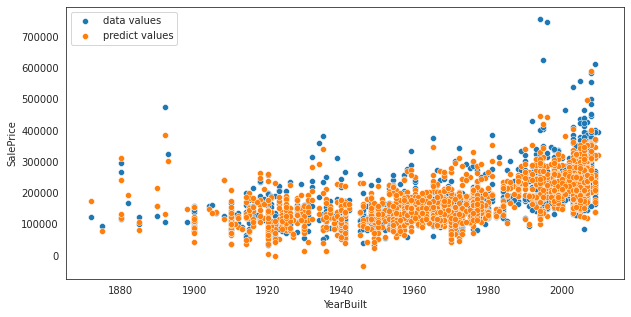

In [72]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['SalePrice'],label="data values",)
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['p_SalePrice'],label="predict values",)
